# Divide face into parts

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from faceparsing.parser import FaceParser
from imagine.shape.segment import ParsingSegmenter
from imagine.color.utils import Recolor, generate_distinct_colors
from imagine.color.conversion import BgrToRgb

In [2]:
img_path = "face.jpg"

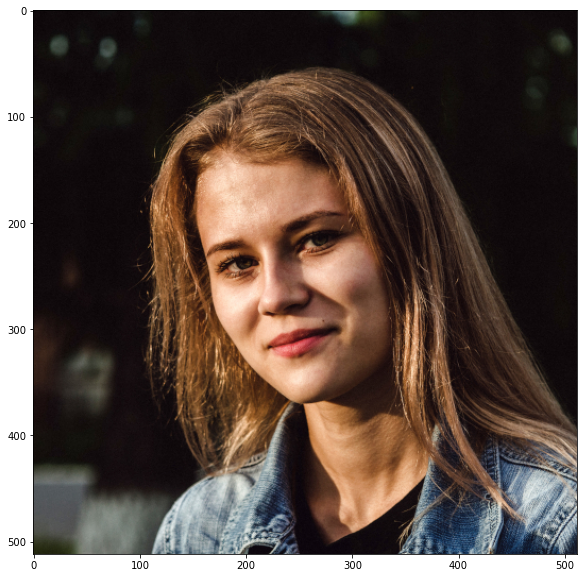

In [3]:
image = BgrToRgb(cv2.imread(img_path))
plt.figure(figsize=(10,10))
plt.imshow(image)

In [4]:
parser = FaceParser()

In [5]:
parts_map = {
    "skin": 1,
    "l_eye": 2,
    "r_eye": 3,
    "hair": 4,
    "u_lip": 5,
    "l_lip": 5
}

In [6]:
segmented = ParsingSegmenter(parser, parts_map=parts_map)(image)

In [7]:
cmap = {code: color for code, color in zip(parts_map.values(), generate_distinct_colors(len(parts_map.values())))}

recolored = np.copy(image)
for c in cmap:
    recolored = Recolor(cmap[c], 0.0)(recolored, mask = segmented == c)

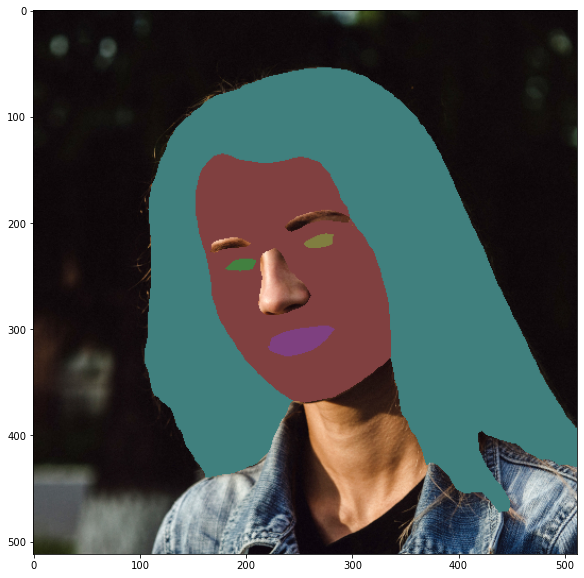

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(recolored)